In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/raw/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# from sklearn.preprocessing import LabelEncoder
# #sex
# le = LabelEncoder()
# le.fit(data.sex.drop_duplicates()) 
# data.sex = le.transform(data.sex)
# # smoker or not
# le.fit(data.smoker.drop_duplicates()) 
# data.smoker = le.transform(data.smoker)
# #region
# le.fit(data.region.drop_duplicates()) 
# data.region = le.transform(data.region)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

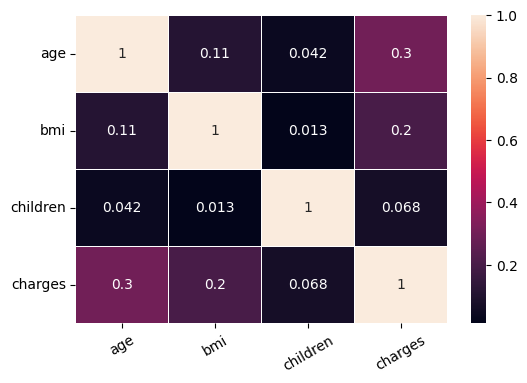

In [8]:
corr_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,linewidths=.4, ax=ax)
plt.yticks(rotation = 0);
plt.xticks(rotation = 30);

In [9]:
for i in data['region'].unique():
    data_region = data.loc[data['region'] == i]
    sum_region = data_region['charges'].sum()
    print(f'Sum of charges in {i} region: {sum_region}')

Sum of charges in southwest region: 4012754.6476200004
Sum of charges in southeast region: 5363689.763289999
Sum of charges in northwest region: 4035711.9965399997
Sum of charges in northeast region: 4343668.583309


Text(0.5, 1.0, 'Distribution of Charges')

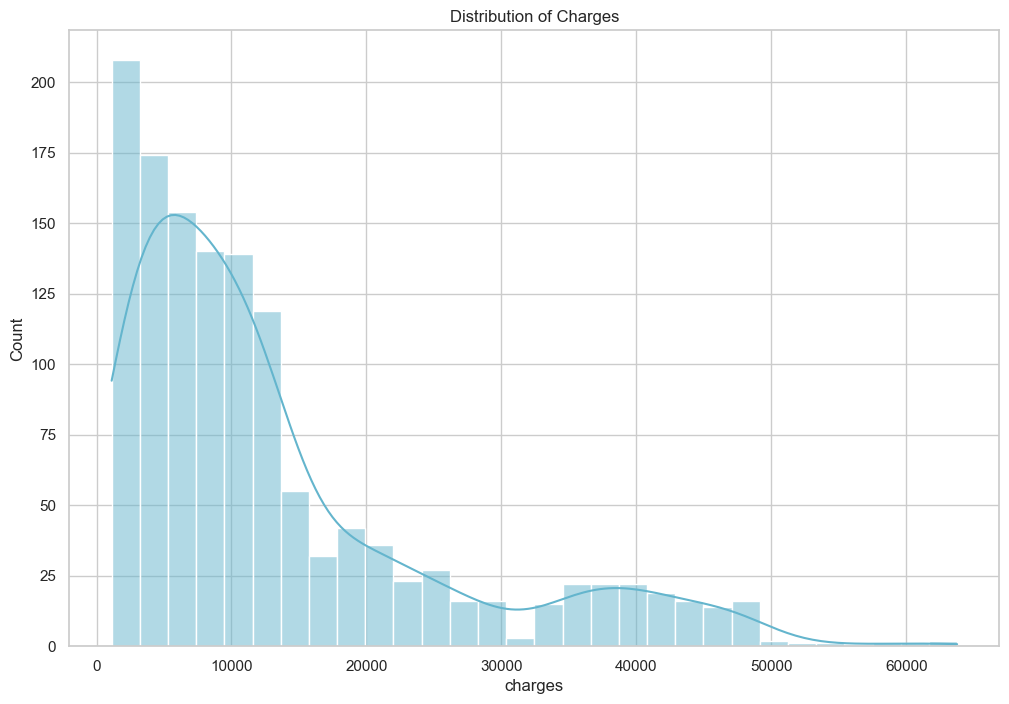

In [10]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

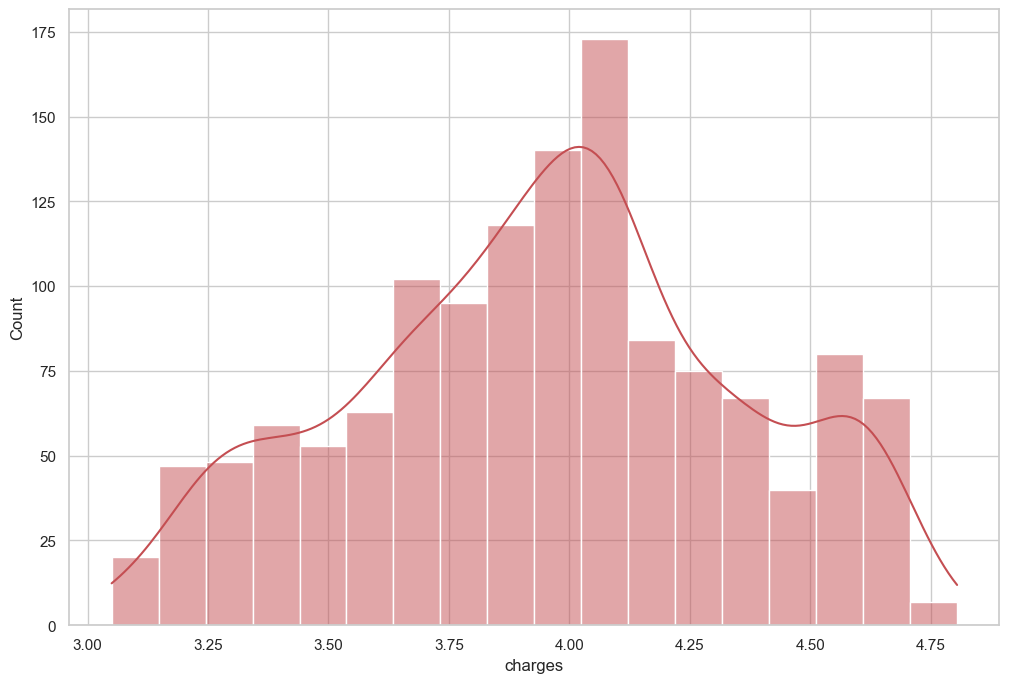

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(np.log10(data['charges']), kde = True, color = 'r')

C:\Users\trswc\AppData\Local\Temp\ipykernel_10448\451730827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=charges_region.head(), y=charges_region.head().index, palette='Blues')


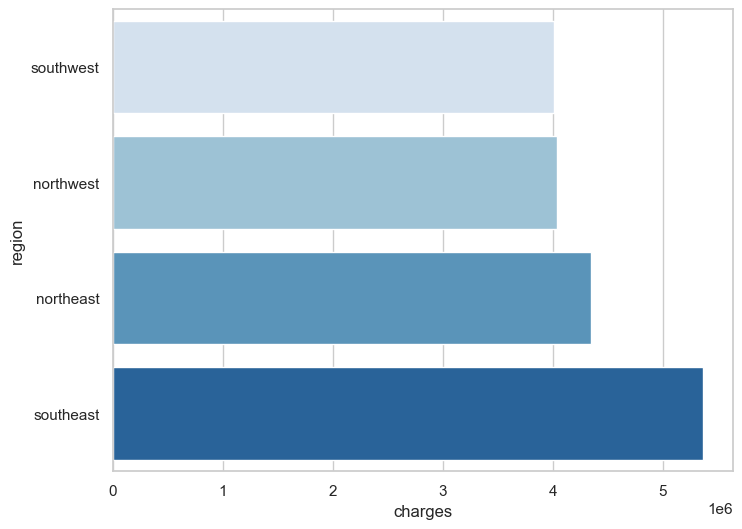

In [12]:
charges_region = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges_region.head(), y=charges_region.head().index, palette='Blues')

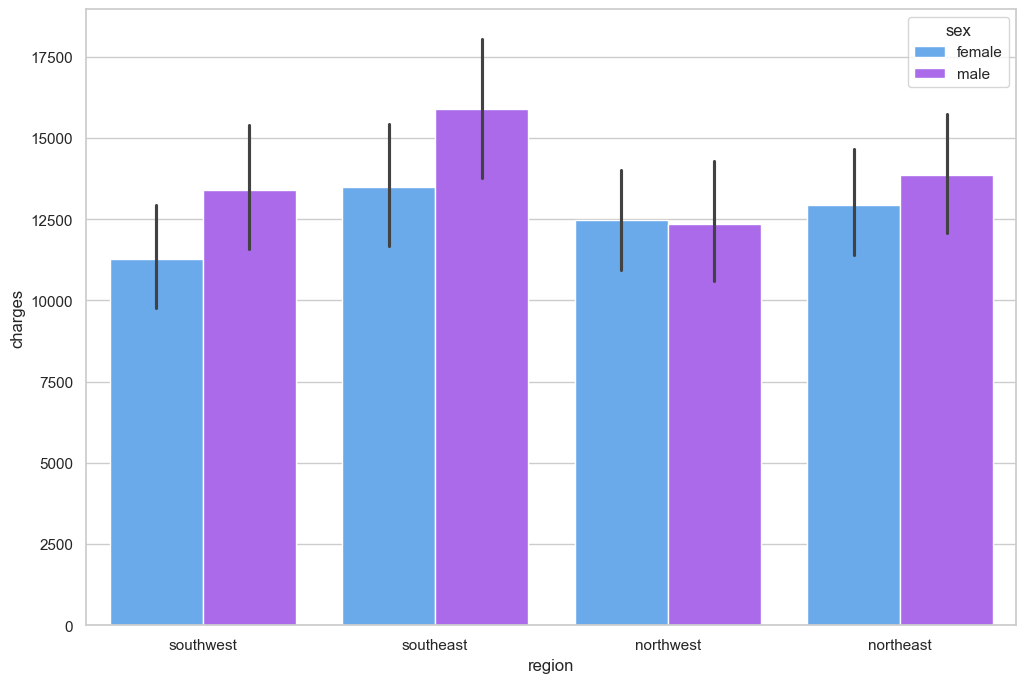

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')

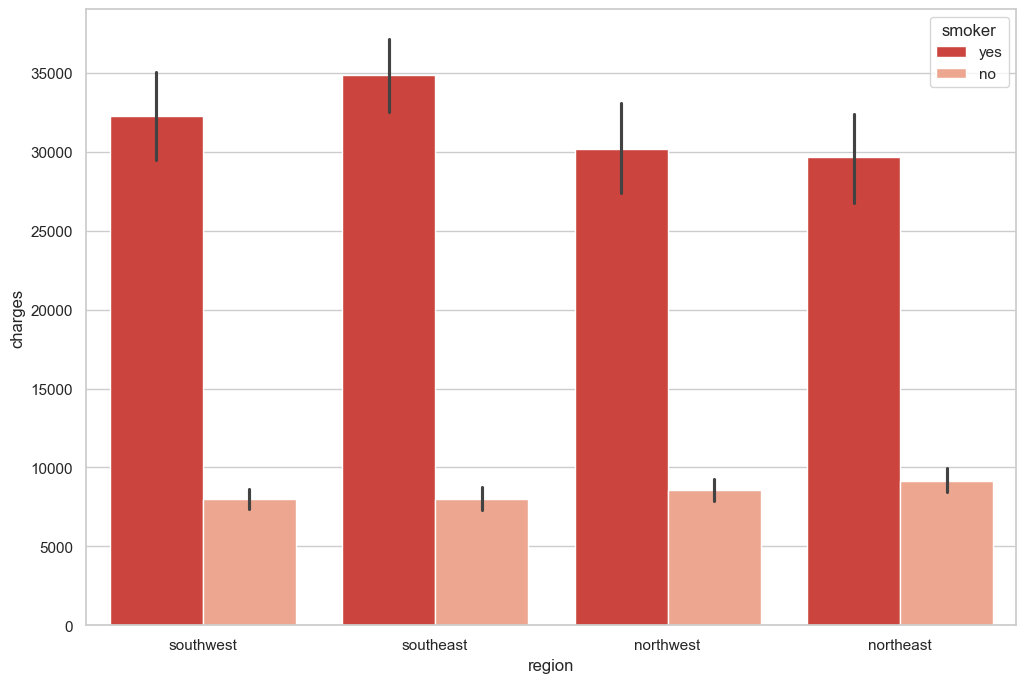

In [14]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=data, palette='Reds_r')

C:\Users\trswc\AppData\Local\Temp\ipykernel_10448\2240996030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=charges_smokers.head(), y=charges_smokers.head().index, palette='Blues')


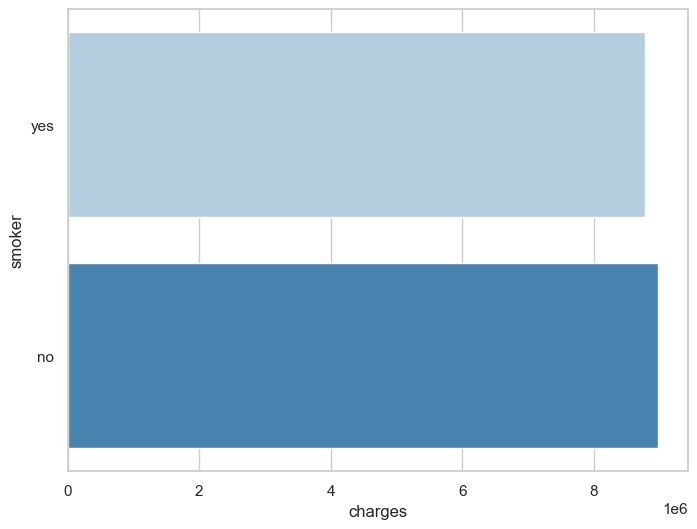

In [15]:
charges_smokers = data['charges'].groupby(data.smoker).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges_smokers.head(), y=charges_smokers.head().index, palette='Blues')

In [16]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\trswc\AppData\Local\Temp\ipykernel_10448\1047459299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges', data=data, palette='magma', ax=ax)
C:\Users\trswc\AppData\Local\Temp\ipykernel_10448\1047459299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=data, palette='cubehelix', ax=ax)


<Axes: xlabel='smoker', ylabel='charges'>

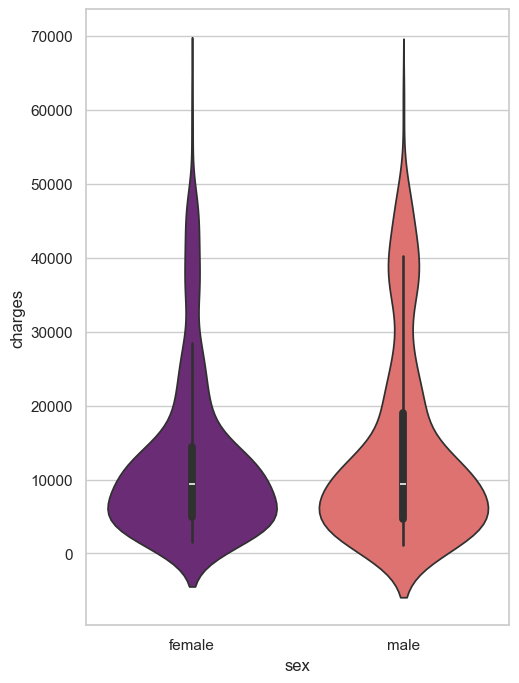

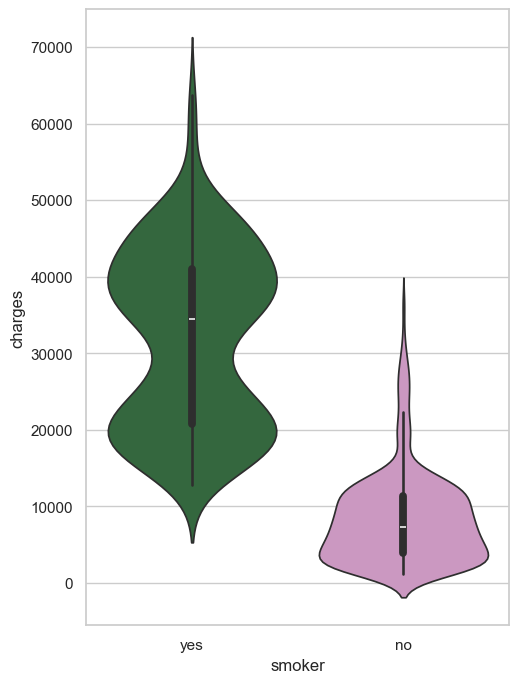

In [17]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=data, palette='magma', ax=ax)

f = plt.figure(figsize=(12,8))
ax = f.add_subplot(121)
sns.violinplot(x='smoker', y='charges', data=data, palette='cubehelix', ax=ax)

almost 4 times less smokers yet sum of payments is almost equal to ones paid by non-smokers <br>
after googling turns out that States have tobbaco rating, making smokers pay on average 50% for treatment

<Axes: xlabel='bmi', ylabel='charges'>

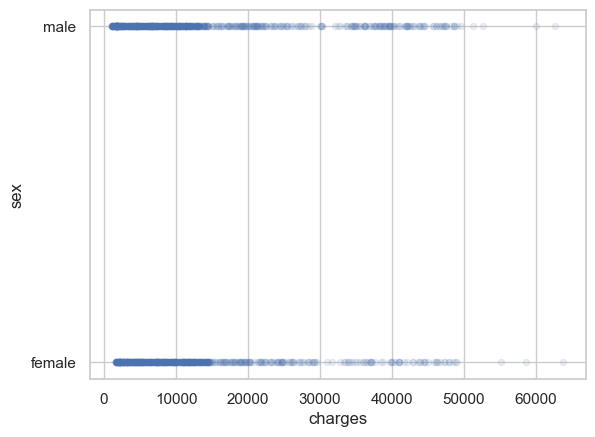

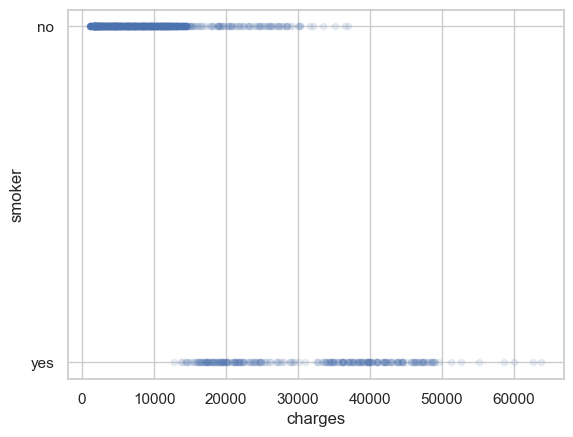

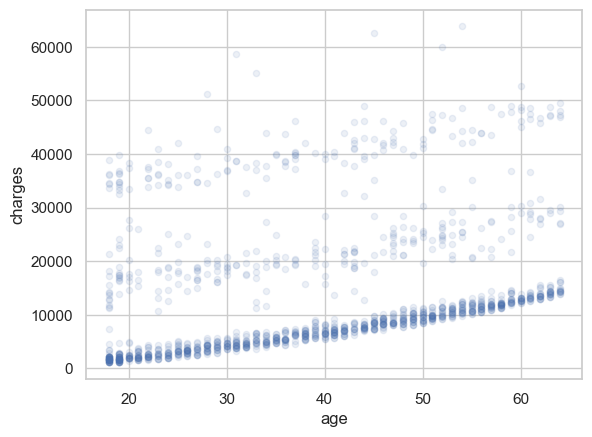

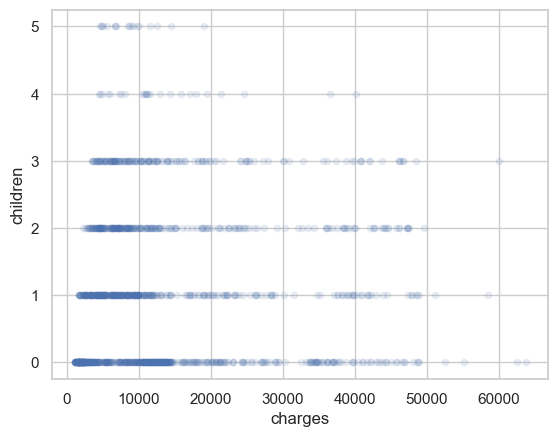

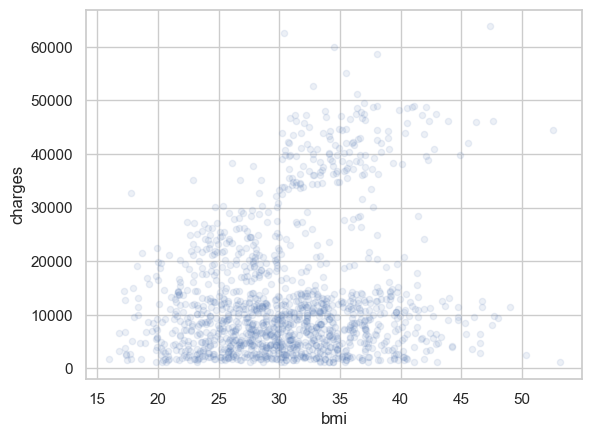

In [18]:
data.plot(kind="scatter", y="sex", x="charges", alpha=0.1)
data.plot(kind="scatter", y="smoker", x="charges", alpha=0.1)
data.plot(kind="scatter", x="age", y="charges", alpha=0.1)
data.plot(kind="scatter", x="charges", y="children", alpha=0.1)
data.plot(kind="scatter", x="bmi", y="charges", alpha=0.1)

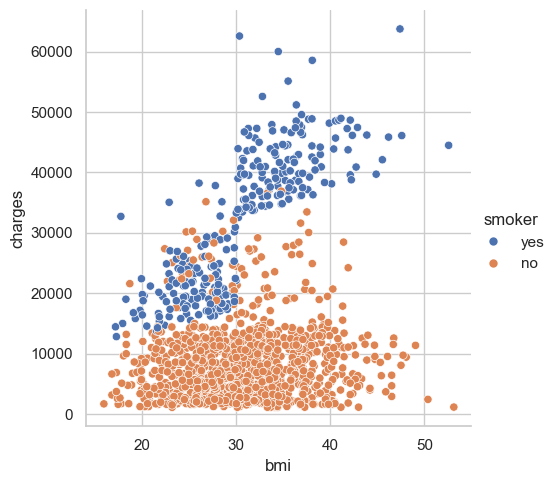

In [19]:
sns.relplot(x='bmi', y='charges', hue='smoker', data=data)

In [20]:
data.loc[data['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [21]:
smokers_bot = data.loc[(data['smoker'] == 'yes') & (data['charges'] < 34400)]
smokers_top = data.loc[(data['smoker'] == 'yes') & (data['charges'] > 34400)]

<Axes: xlabel='bmi', ylabel='charges'>

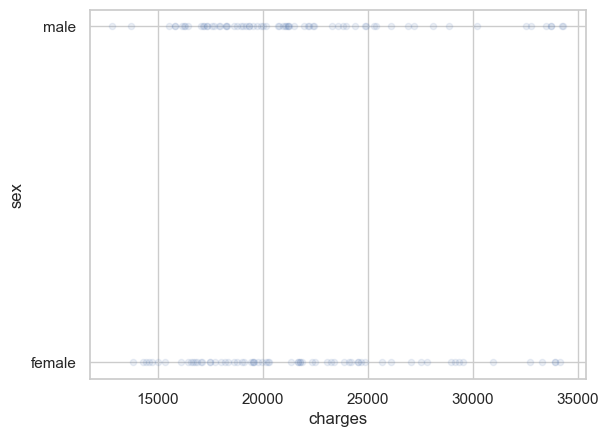

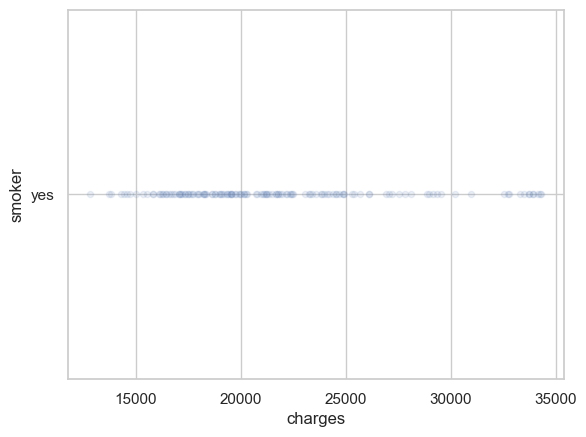

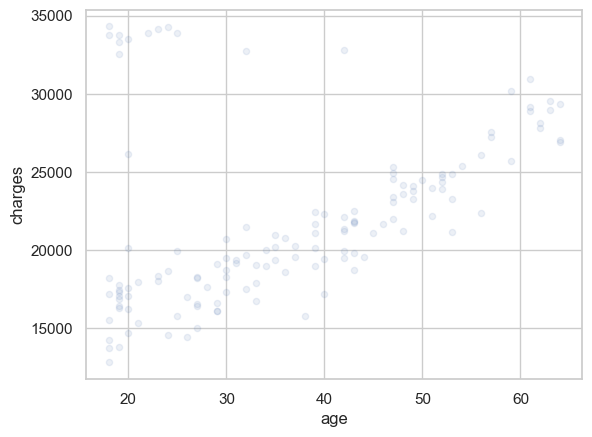

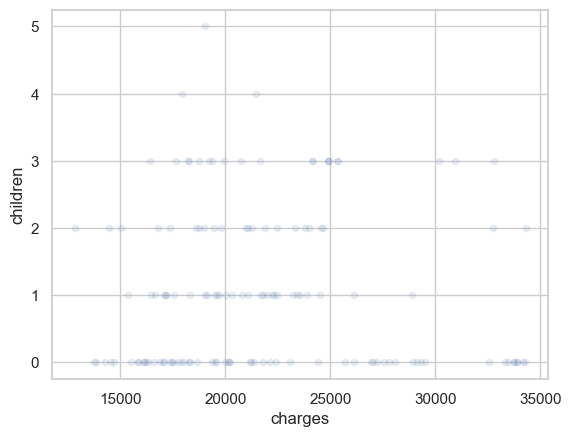

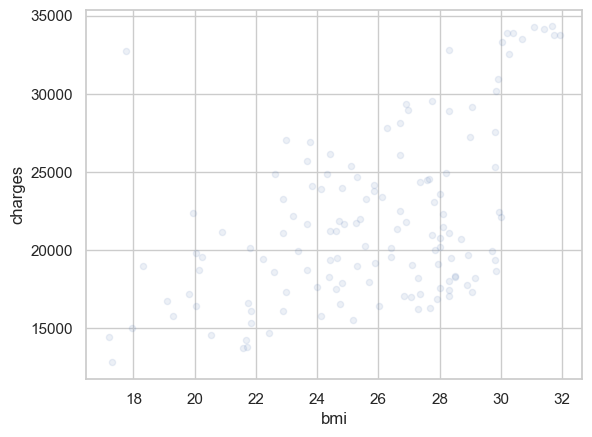

In [22]:
smokers_bot.plot(kind="scatter", y="sex", x="charges", alpha=0.1)
smokers_bot.plot(kind="scatter", y="smoker", x="charges", alpha=0.1)
smokers_bot.plot(kind="scatter", x="age", y="charges", alpha=0.1)
smokers_bot.plot(kind="scatter", x="charges", y="children", alpha=0.1)
smokers_bot.plot(kind="scatter", x="bmi", y="charges", alpha=0.1)

<Axes: xlabel='bmi', ylabel='charges'>

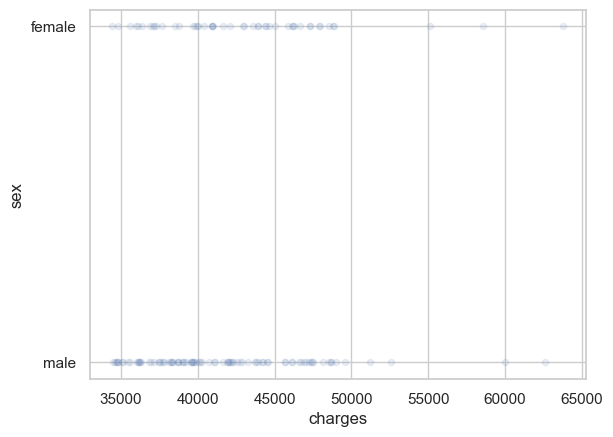

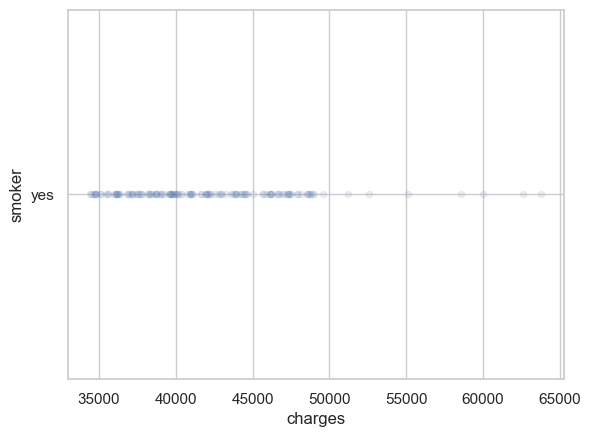

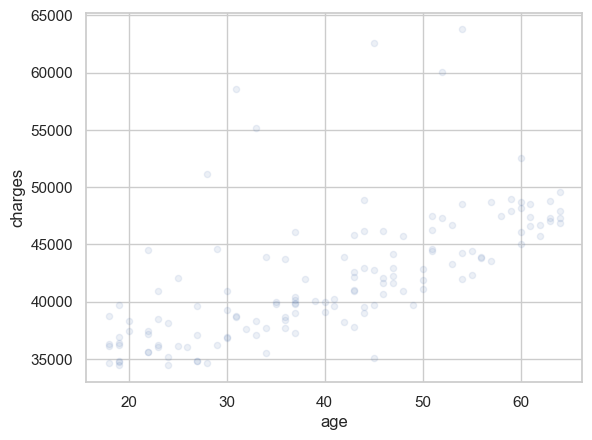

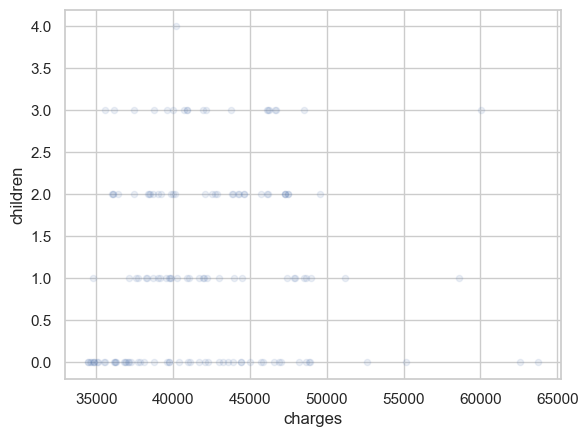

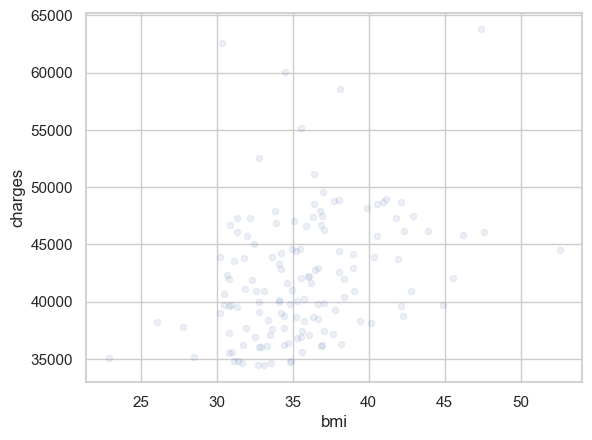

In [23]:
smokers_top.plot(kind="scatter", y="sex", x="charges", alpha=0.1)
smokers_top.plot(kind="scatter", y="smoker", x="charges", alpha=0.1)
smokers_top.plot(kind="scatter", x="age", y="charges", alpha=0.1)
smokers_top.plot(kind="scatter", x="charges", y="children", alpha=0.1)
smokers_top.plot(kind="scatter", x="bmi", y="charges", alpha=0.1)

Text(0.5, 1.0, 'Smokers and non-smokers')

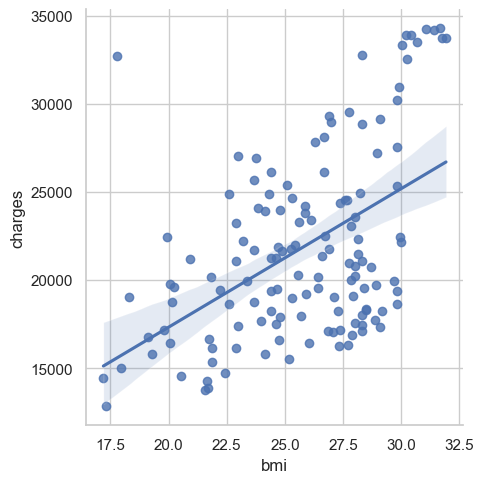

In [24]:
sns.lmplot(x="bmi", y="charges", data=smokers_bot, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

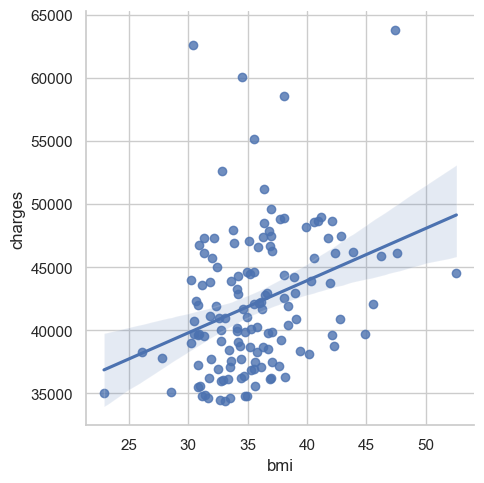

In [25]:
sns.lmplot(x="bmi", y="charges", data=smokers_top, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

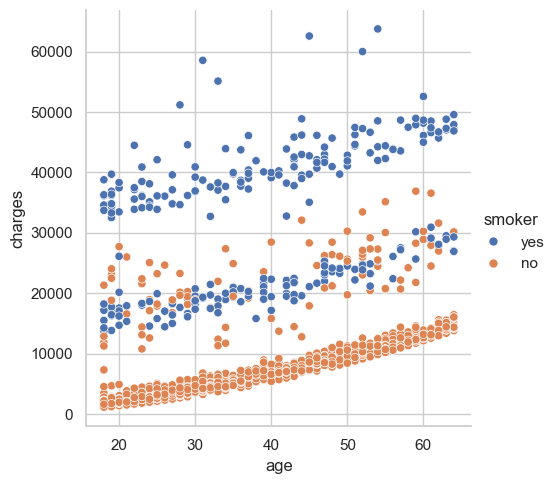

In [26]:
sns.relplot(x='age', y='charges', hue='smoker', data=data)

Text(0.5, 1.0, 'Smokers and non-smokers')

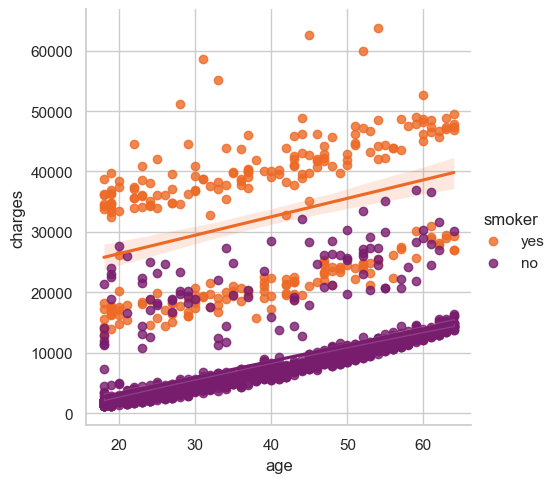

In [27]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

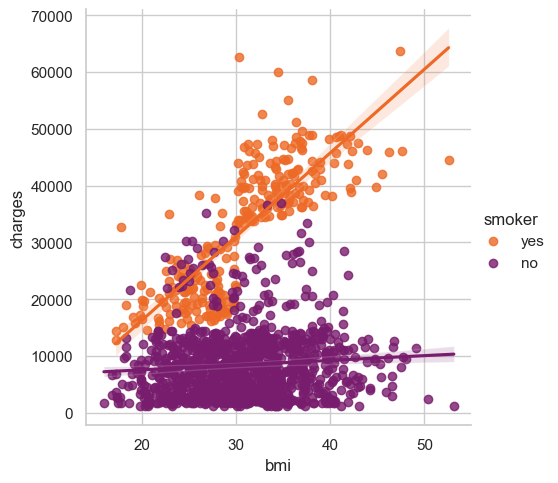

In [28]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

In [29]:
from sklearn.preprocessing import LabelEncoder
# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
# region
# le.fit(data.region.drop_duplicates()) 
# data.region = le.transform(data.region)

data = pd.concat([data, pd.get_dummies(data['region']).astype(int)], axis = 1)
# data = data.drop(columns= 'northwest')
data = data.drop(columns= 'region')

In [30]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


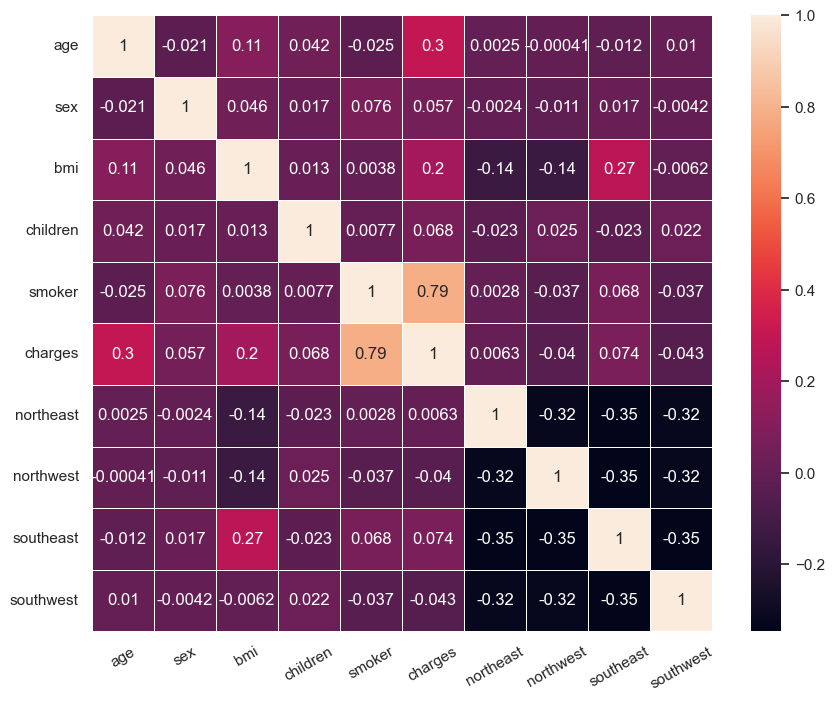

In [31]:
corr_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,linewidths=.4, ax=ax)
plt.yticks(rotation = 0);
plt.xticks(rotation = 30);

In [32]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<b>liniowa regresja</b> - rozkład normalny zmiennej celu (log), <b>zmienne silnie skorelowane ze zmienną celu</b> i najmniej skorelowane ze sobą (np. bmi i smoker) (<b>nie stosuje się do zmiennych kategorycznych</b>), onehotencoding dla regionu</br>
wybrać jeden model na początek - kroswalidacja, skalowanie danych i tuning hyperparametrów

<b>metryki, przejrzeć</b> - mse, mae, mape, rmse, r^2

mape może dać dziwne wyniki - sprawdzić dlaczego i jak obejść (sidequest) i zwizualizować

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb

from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2


X = data.drop("charges", axis=1)
y = data["charges"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)
X_train.shape[0] / data.shape[0], X_test.shape[0] / data.shape[0]

(0.6995515695067265, 0.3004484304932735)

In [34]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


MAE Train:  2109.42
MAE Test:  2591.2
Różnica MAE:  -481.78
--------------------------------------------------
MSE Train:  14869467.68
MSE Test:  22812576.9
Różnica MSE:  -7943109.21
--------------------------------------------------
MAPE Train:  0.27
MAPE Test:  0.31
Różnica MAPE:  -0.04
--------------------------------------------------
RMSE Train:  3856.09
RMSE Test:  4776.25
Różnica RMSE:  -920.16
--------------------------------------------------
R2 Train:  0.9
R2 Test:  0.84
Różnica R2:  0.07


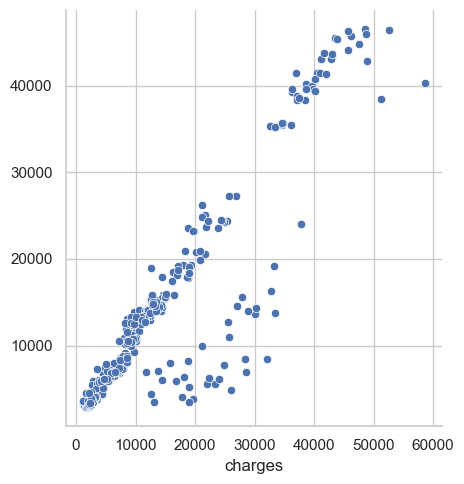

In [35]:
model = RandomForestRegressor(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

sns.relplot(x=y_test, y=y_pred_test)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'criterion': ['poisson', 'absolute_error','squared_error', 'friedman_mse'],
    'max_depth': [None] + list(range(1, 60)),
    'min_samples_split': list(range(2, 40)),
    'min_samples_leaf': list(range(1, 40)),
    'random_state': list(range(1,150))
}

# Inicjalizacja Grid Search
model = RandomForestRegressor()
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter = 100, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)

# Uruchomienie procesu wyszukiwania
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

# Wyświetlenie najlepszej dokładności
print("Najlepsza dokładność:", grid_search.best_score_)

# Użycie najlepszego modelu do przewidywania na danych testowych
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print("MAE Test: ", mae(y_test, y_pred_test).round(2))

Najlepsze parametry: {'random_state': 104, 'min_samples_split': 14, 'min_samples_leaf': 12, 'max_depth': 57, 'criterion': 'absolute_error'}
Najlepsza dokładność: -1998.7875361946576
MAE Test:  1930.72


MAE Train:  1556.63
MAE Test:  1891.97
Różnica MAE:  -335.34
--------------------------------------------------
MSE Train:  18340087.74
MSE Test:  23087084.5
Różnica MSE:  -4746996.76
--------------------------------------------------
MAPE Train:  0.1
MAPE Test:  0.12
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4282.53
RMSE Test:  4804.9
Różnica RMSE:  -522.37
--------------------------------------------------
R2 Train:  0.88
R2 Test:  0.83
Różnica R2:  0.04


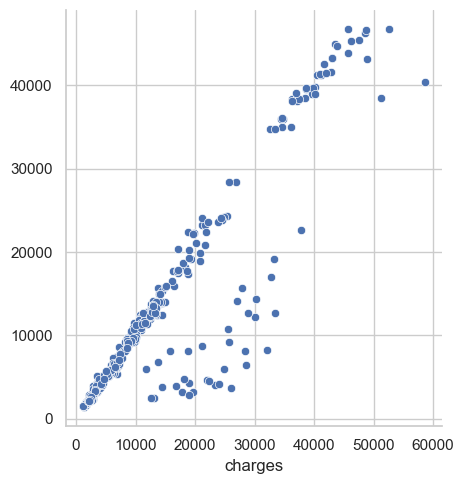

In [37]:
model = RandomForestRegressor(max_depth=13, n_estimators=100, min_samples_split=14, min_samples_leaf=6, criterion='absolute_error', random_state=18)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

sns.relplot(x=y_test, y=y_pred_test)

<b>r2</b> jak bardzo wariancja celu (y) została wyjaśniona przez wariancję zbioru cech<br>
<b>mape</b> - sprawdzić równania - procentowa wartość<br>
<b>rme</b> - outliery - w równaniu jest kwadrat więc wywala outliery w kosmos<br>
<b>rmse</b> - średnio myli się o tyle<br>
<b>mae</b> - nie ma kwadratu w równaniu i nie wykaże outlierów<br>
wykres y - y prediction, x - y test

MAE Train:  1548.58
MAE Test:  1893.8
Różnica MAE:  -345.22
--------------------------------------------------
MSE Train:  18301141.15
MSE Test:  23055943.1
Różnica MSE:  -4754801.95
--------------------------------------------------
MAPE Train:  0.1
MAPE Test:  0.12
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4277.98
RMSE Test:  4801.66
Różnica RMSE:  -523.68
--------------------------------------------------
R2 Train:  0.88
R2 Test:  0.83
Różnica R2:  0.04


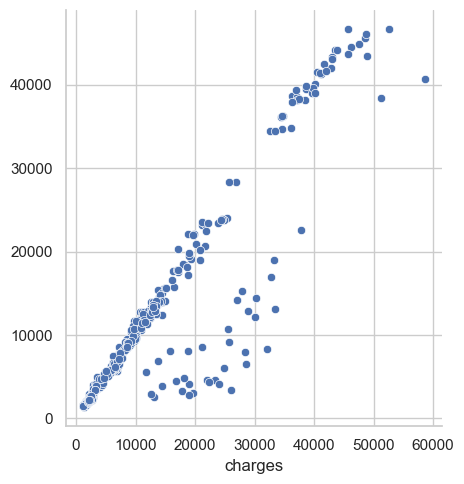

In [38]:
model = RandomForestRegressor(max_depth=13, n_estimators=100, min_samples_split=12, min_samples_leaf=6, criterion='absolute_error')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

sns.relplot(x=y_test, y=y_pred_test)

In [39]:
model = RandomForestRegressor(max_depth=27, n_estimators=100, min_samples_split=12, min_samples_leaf=7, criterion='absolute_error')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

MAE Train:  1559.43
MAE Test:  1878.57
Różnica MAE:  -319.14
--------------------------------------------------
MSE Train:  18619995.19
MSE Test:  23200392.76
Różnica MSE:  -4580397.57
--------------------------------------------------
MAPE Train:  0.1
MAPE Test:  0.12
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4315.09
RMSE Test:  4816.68
Różnica RMSE:  -501.59
--------------------------------------------------
R2 Train:  0.88
R2 Test:  0.83
Różnica R2:  0.04


In [40]:
model = RandomForestRegressor(max_depth=20, n_estimators=100, min_samples_split=20, min_samples_leaf=7, criterion='absolute_error', random_state=43)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

MAE Train:  1606.87
MAE Test:  1903.56
Różnica MAE:  -296.7
--------------------------------------------------
MSE Train:  18944006.63
MSE Test:  23431663.07
Różnica MSE:  -4487656.44
--------------------------------------------------
MAPE Train:  0.1
MAPE Test:  0.12
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4352.47
RMSE Test:  4840.63
Różnica RMSE:  -488.15
--------------------------------------------------
R2 Train:  0.87
R2 Test:  0.83
Różnica R2:  0.04


In [41]:
model = RandomForestRegressor(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

MAE Train:  2097.52
MAE Test:  2561.18
Różnica MAE:  -463.66
--------------------------------------------------
MSE Train:  14913346.38
MSE Test:  22492759.6
Różnica MSE:  -7579413.21
--------------------------------------------------
MAPE Train:  0.26
MAPE Test:  0.3
Różnica MAPE:  -0.04
--------------------------------------------------
RMSE Train:  3861.78
RMSE Test:  4742.65
Różnica RMSE:  -880.87
--------------------------------------------------
R2 Train:  0.9
R2 Test:  0.84
Różnica R2:  0.06


In [42]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train,X_test,y_train,y_test)

print(models)

 17%|█▋        | 7/42 [00:00<00:01, 29.10it/s]  File "c:\Users\trswc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|██████████| 42/42 [00:08<00:00,  5.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 9
[LightGBM] [Info] Start training from score 13397.447636
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.83       0.84   4771.38   
HistGradientBoostingRegressor                0.82       0.83   4925.32   
RandomForestRegressor                        0.82       0.82   4940.22   
LGBMRegressor                                0.82       0.82   4945.72   
AdaBoostRegressor                            0.80       0.81   5182.11   
BaggingRegressor                             0.80       0.80   5239.82   
XG

In [43]:
# pycart - automl

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'],
    'loss': ['squared_error','absolute_error','huber', 'quantile'],
    'n_estimators': list(range(1, 250)),
    'min_samples_split': list(range(1,100)),
    'min_samples_leaf': list(range(1,100)),
    'max_depth': list(range(1,100))
}

# Inicjalizacja Grid Search
model = GradientBoostingRegressor(random_state = 42)
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter = 100, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)

# Uruchomienie procesu wyszukiwania
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

# Wyświetlenie najlepszej dokładności
print("Najlepsza dokładność:", grid_search.best_score_)

# Użycie najlepszego modelu do przewidywania na danych testowych
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print("MAE Test: ", mae(y_test, y_pred_test).round(2))

Najlepsze parametry: {'n_estimators': 183, 'min_samples_split': 22, 'min_samples_leaf': 33, 'max_depth': 58, 'loss': 'huber', 'criterion': 'friedman_mse'}
Najlepsza dokładność: -1902.466478840764
MAE Test:  1811.65


In [46]:
model = GradientBoostingRegressor(n_estimators= 194, min_samples_split= 34, min_samples_leaf= 21, max_depth= 2, loss= 'huber', criterion= 'friedman_mse')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

MAE Train:  1630.53
MAE Test:  1912.1
Różnica MAE:  -281.57
--------------------------------------------------
MSE Train:  18925653.07
MSE Test:  23176328.23
Różnica MSE:  -4250675.16
--------------------------------------------------
MAPE Train:  0.11
MAPE Test:  0.14
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4350.36
RMSE Test:  4814.18
Różnica RMSE:  -463.82
--------------------------------------------------
R2 Train:  0.87
R2 Test:  0.83
Różnica R2:  0.04


In [47]:
model = GradientBoostingRegressor(loss= 'huber', criterion= 'friedman_mse')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

MAE Train:  1434.45
MAE Test:  1756.99
Różnica MAE:  -322.55
--------------------------------------------------
MSE Train:  18202824.2
MSE Test:  23059546.32
Różnica MSE:  -4856722.11
--------------------------------------------------
MAPE Train:  0.09
MAPE Test:  0.11
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  4266.48
RMSE Test:  4802.04
Różnica RMSE:  -535.56
--------------------------------------------------
R2 Train:  0.88
R2 Test:  0.83
Różnica R2:  0.04
